In [1]:
import pandas as pd 
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [4]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


# New Section

In [8]:
data=pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [ ]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [7]:
data.drop(["id"],axis=1,inplace=True)

In [ ]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
data.columns=['age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']

In [ ]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [10]:
data.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [11]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [13]:
data['class'].unique()

KeyError: ignored

In [14]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

KeyError: ignored

In [15]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([ 1, 11, 14]))

In [16]:
catcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(catcols)

{'hemo', 'rbc', 'id', 'sg', 'ba', 'bu', 'age', 'sod', 'dm', 'sc', 'wc', 'bp', 'htn', 'pcv', 'pcc', 'pc', 'classification', 'pot', 'appet', 'bgr', 'pe', 'rc', 'ane', 'al', 'su', 'cad'}


In [17]:
for i in catcols:
  print("Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns: hemo
Counter({15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9: 3, 15.3: 3, 17.8: 3, 12.1: 2, 9.3: 2, 10.2: 2, 10.5: 2, 6.0: 2, 11.7: 2, 8.0: 2, 12.3: 2, 8.7: 2, 13.1: 2, 8.8: 2, 13.3: 2, 14.6: 2, 16.9: 2, 16.0: 2, 14.7: 2, 16.6: 2, 16.7: 2, 16.8: 2, 15.1: 2, 17.1: 2, 17.2: 2, 17.4: 2, 5.6: 1, 7.6: 1, 7.7: 1, nan: 1, nan: 1, 12.9: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.6: 1, nan: 1, nan: 1, 7.5: 1, nan: 1, nan: 1, 4.8: 1, nan: 1, nan: 1, 7.1: 1, nan: 1, nan: 1, nan: 1, 9.2: 1, nan: 1, 6.2: 1, 

In [20]:
catcols.remove('red_blood_cell_count')
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

KeyError: ignored

In [21]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'hemo', 'rbc', 'id', 'sg', 'ba', 'bu', 'age', 'sod', 'dm', 'sc', 'wc', 'bp', 'htn', 'pcv', 'pcc', 'pc', 'classification', 'pot', 'appet', 'bgr', 'pe', 'rc', 'ane', 'al', 'su', 'cad'}


In [22]:
for i in contcols:
  print("Continous Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Continous Columns: hemo
Counter({15.0: 16, 10.9: 8, 9.8: 7, 11.1: 7, 13.0: 7, 13.6: 7, 11.3: 6, 10.3: 6, 12.0: 6, 13.9: 6, 15.4: 5, 11.2: 5, 10.8: 5, 9.7: 5, 12.6: 5, 7.9: 5, 10.0: 5, 14.0: 5, 14.3: 5, 14.8: 5, 12.2: 4, 12.4: 4, 12.5: 4, 15.2: 4, 9.1: 4, 11.9: 4, 13.5: 4, 16.1: 4, 14.1: 4, 13.2: 4, 13.8: 4, 13.7: 4, 13.4: 4, 17.0: 4, 15.5: 4, 15.8: 4, 9.6: 3, 11.6: 3, 9.5: 3, 9.4: 3, 12.7: 3, 9.9: 3, 10.1: 3, 8.6: 3, 11.0: 3, 15.6: 3, 8.1: 3, 8.3: 3, 10.4: 3, 11.8: 3, 11.4: 3, 11.5: 3, 15.9: 3, 14.5: 3, 16.2: 3, 14.4: 3, 14.2: 3, 16.3: 3, 16.5: 3, 15.7: 3, 16.4: 3, 14.9: 3, 15.3: 3, 17.8: 3, 12.1: 2, 9.3: 2, 10.2: 2, 10.5: 2, 6.0: 2, 11.7: 2, 8.0: 2, 12.3: 2, 8.7: 2, 13.1: 2, 8.8: 2, 13.3: 2, 14.6: 2, 16.9: 2, 16.0: 2, 14.7: 2, 16.6: 2, 16.7: 2, 16.8: 2, 15.1: 2, 17.1: 2, 17.2: 2, 17.4: 2, 5.6: 1, 7.6: 1, 7.7: 1, nan: 1, nan: 1, 12.9: 1, nan: 1, nan: 1, nan: 1, nan: 1, 6.6: 1, nan: 1, nan: 1, 7.5: 1, nan: 1, nan: 1, 4.8: 1, nan: 1, nan: 1, 7.1: 1, nan: 1, nan: 1, nan: 1, 9.2: 1, nan: 1

In [23]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

KeyError: ignored

In [19]:
contcols.add('red_blood_cell_count')
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

NameError: ignored

In [24]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'hemo', 'rbc', 'id', 'sg', 'ba', 'bu', 'age', 'sod', 'dm', 'sc', 'sugar', 'wc', 'bp', 'htn', 'pcv', 'specific_gravity', 'pcc', 'albumin', 'pc', 'classification', 'pot', 'appet', 'bgr', 'pe', 'rc', 'ane', 'al', 'su', 'cad'}


In [ ]:
data['coronary_artery_disease']=data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [ ]:
data['diabetesmellitus']=data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
c(data['diabetesmellitus'])

Counter({'yes': 136, 'no': 261, ' yes': 1, nan: 2})

In [ ]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [ ]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

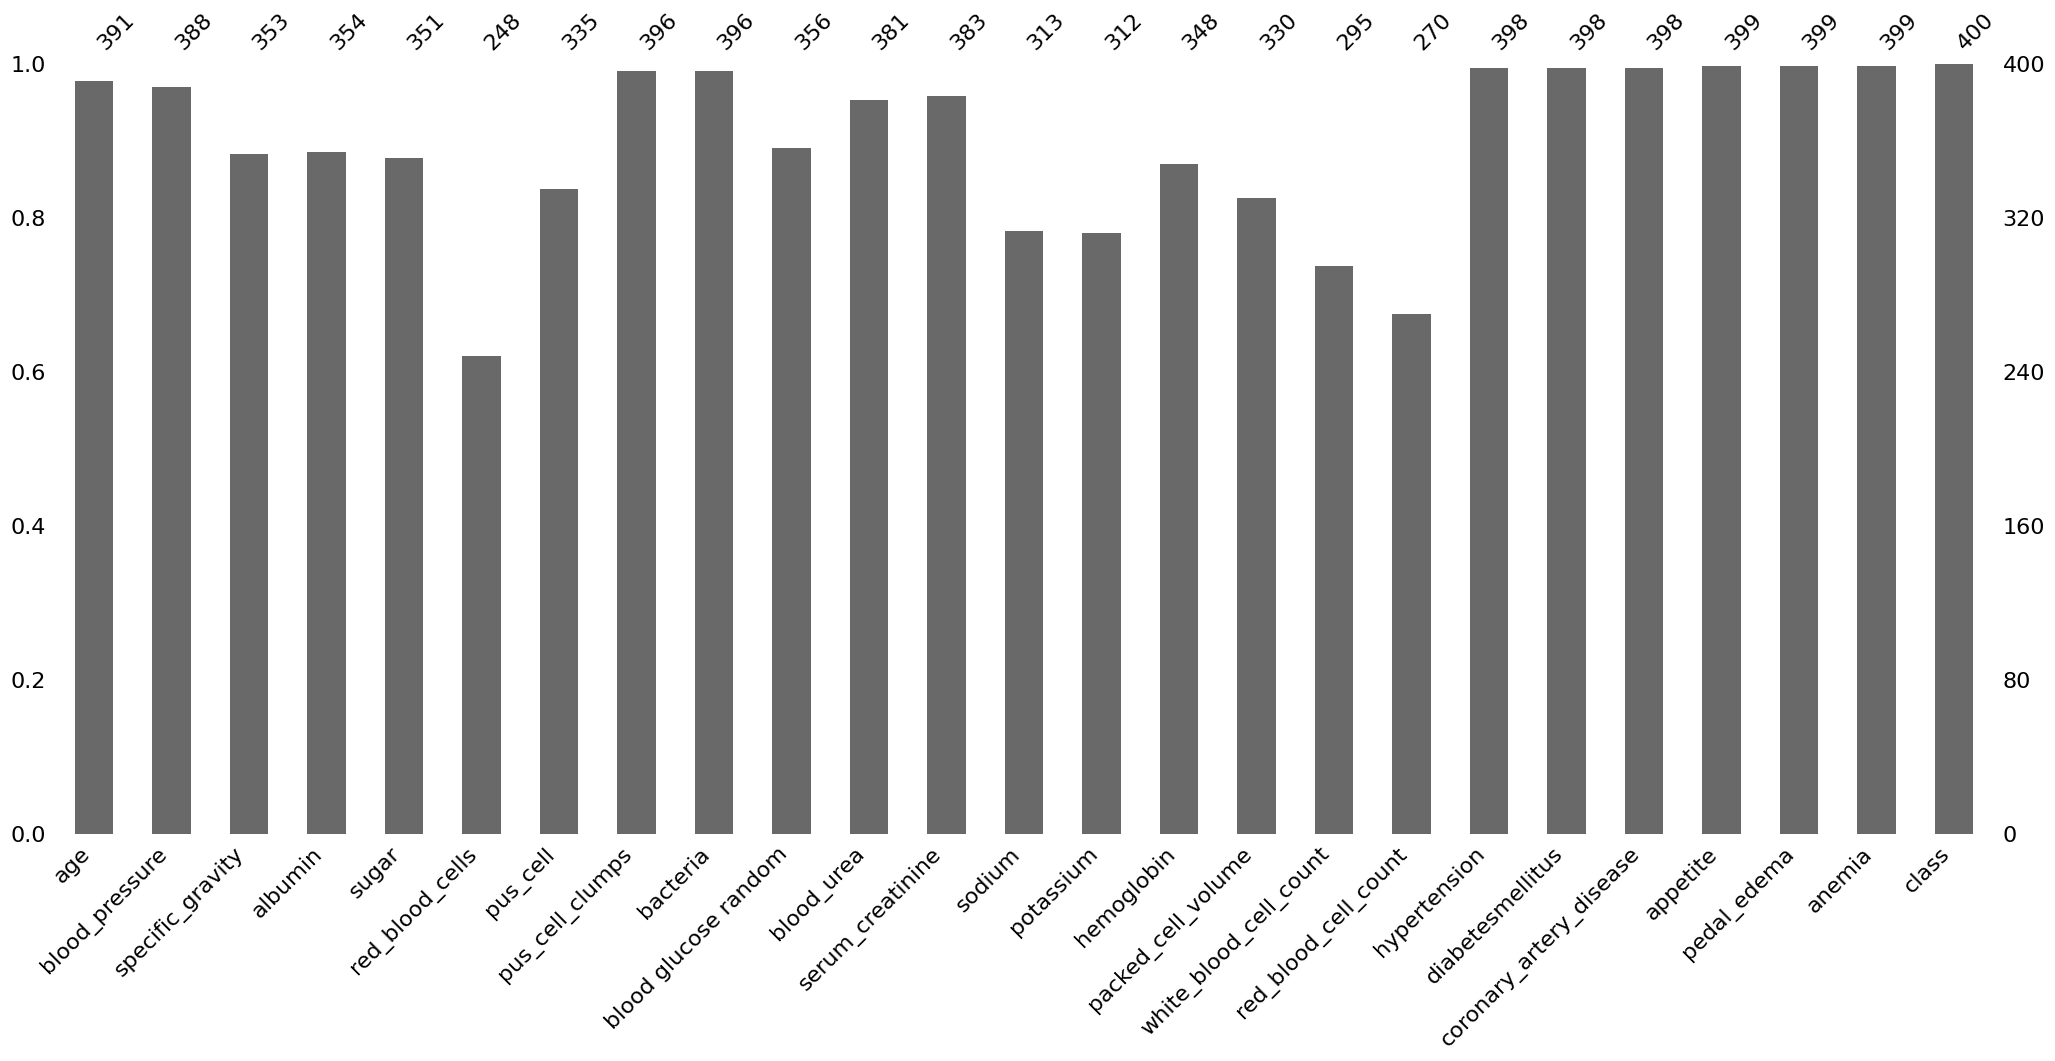

In [ ]:
msno.bar(data)
plt.show()

In [ ]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

In [ ]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)


In [ ]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [ ]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood glucose random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [ ]:
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
         'hypertension','pus_cell','pus_cell_clumps','red_blood_cells']

In [ ]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCODING OF:",i)
  LEi=LabelEncoder()
  print(c(data[i]))
  data[i]=LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

Text(0.5, 1.0, 'age VS blood Scatter Plot')

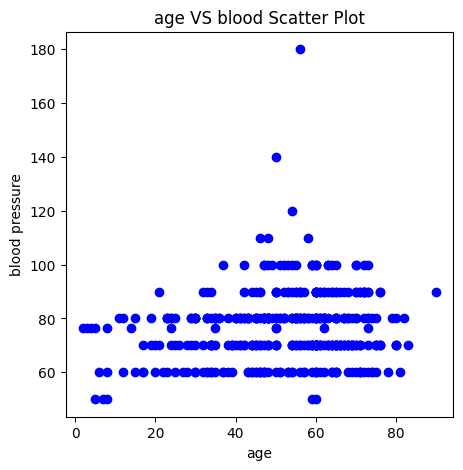

In [ ]:
import matplotlib.pyplot as plt # import the matplotlib libaray 
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'],data['blood_pressure'],color='blue') 
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood pressure') #set the label for y-axis
plt.title("age VS blood Scatter Plot") #set a title for the axes


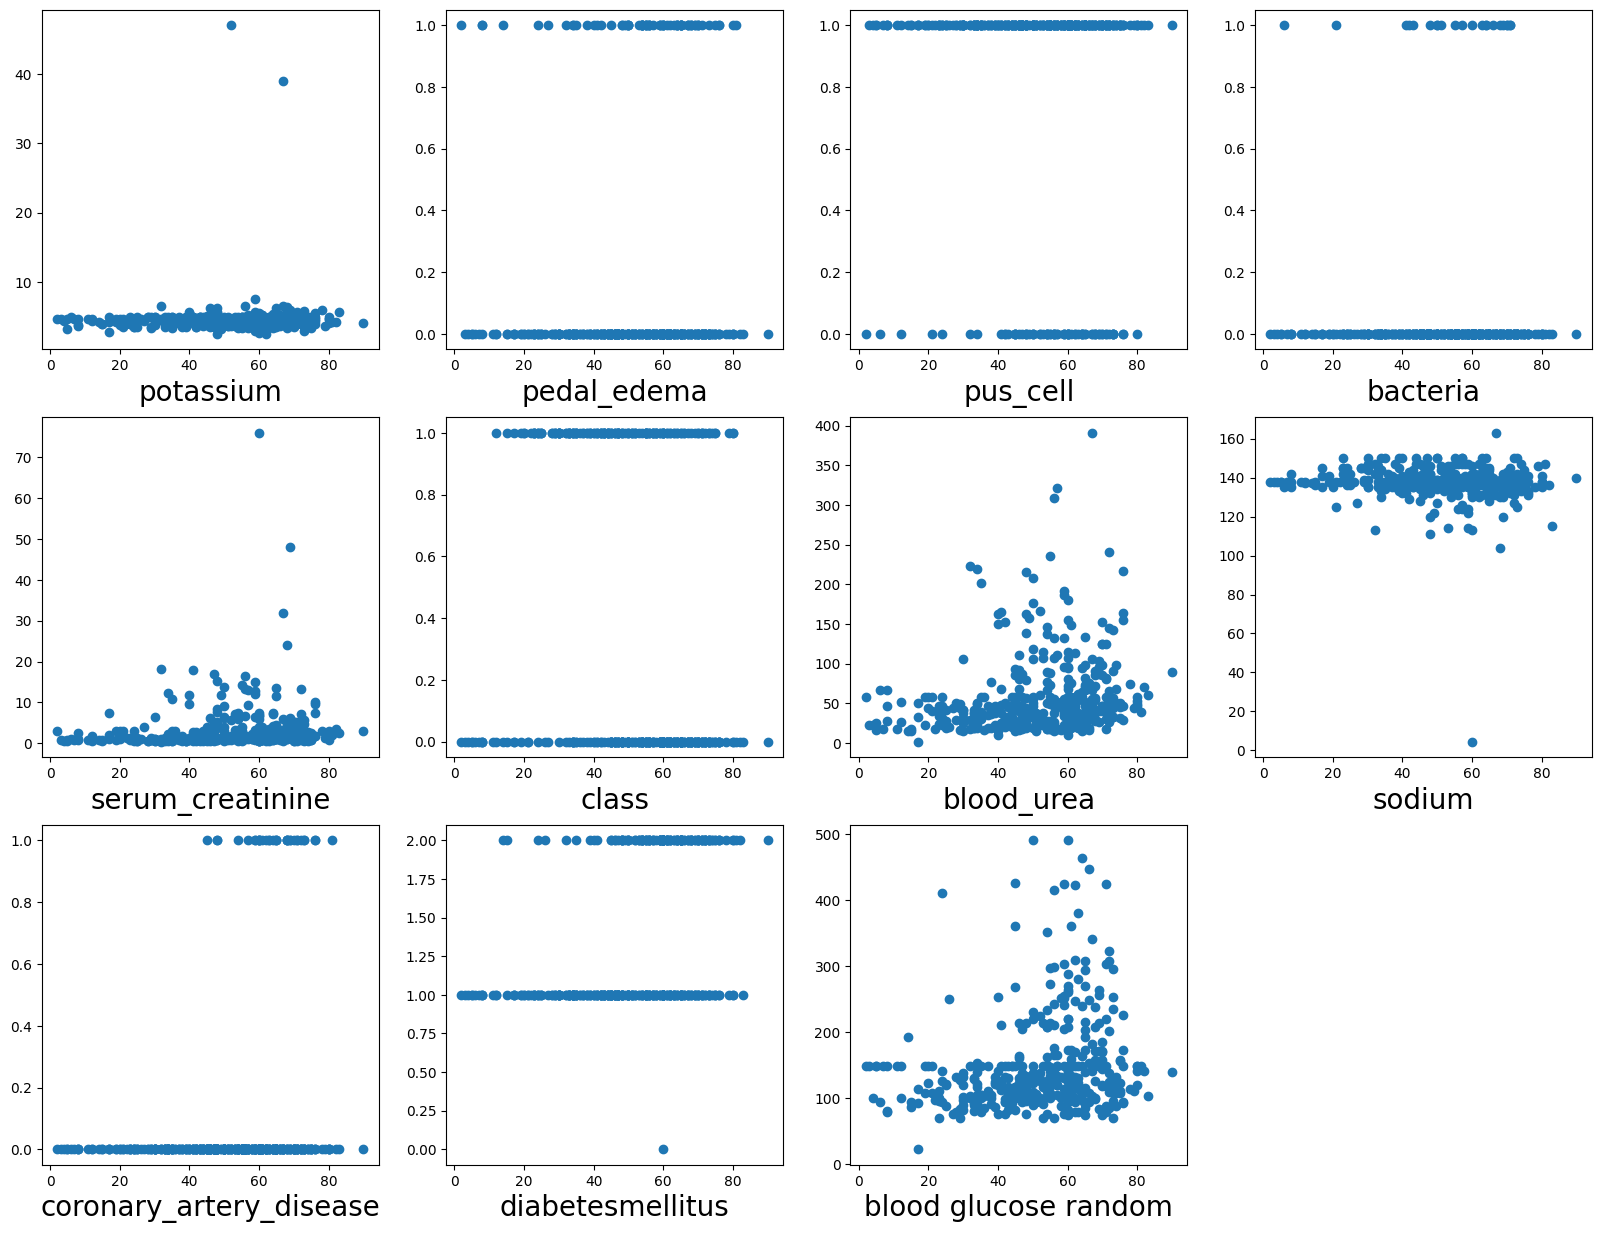

In [ ]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber<=11 :
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(data['age'],data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

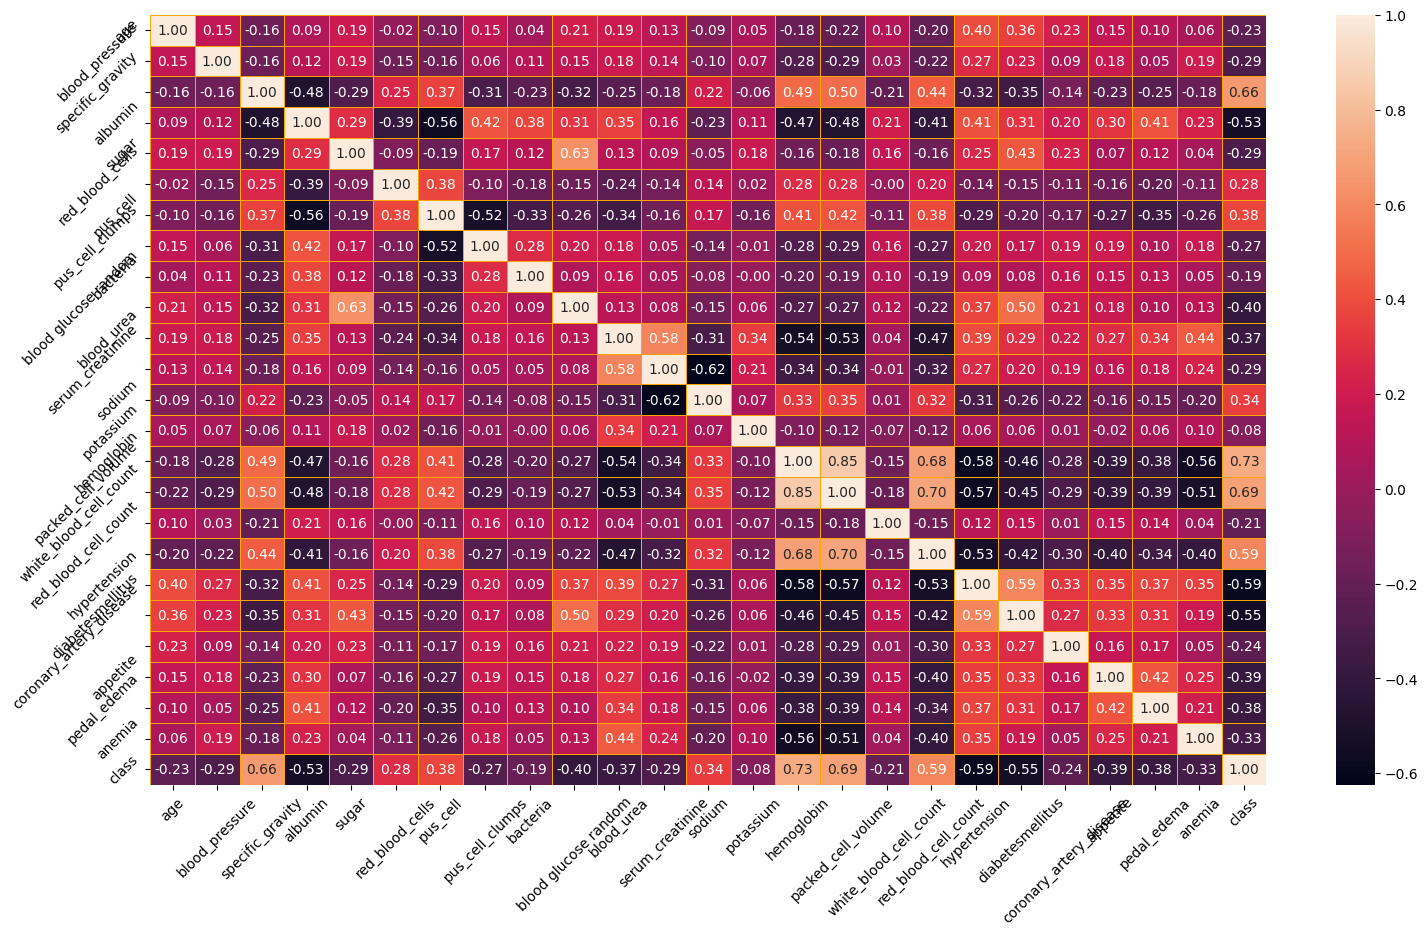

In [ ]:
f,ax=plt.subplots(figsize=(18,10)) 
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
data['class'].unique()

array([0, 1])

<Axes: ylabel='count'>

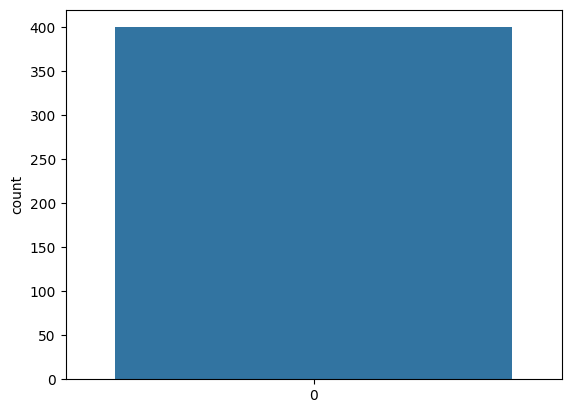

In [ ]:
sns.countplot(data['class'])

In [ ]:
selcols=['red_blood_cells','pus_cell', 'blood glucose random','blood_urea',
            'pedal_edema', 'anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)#train test split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 8)
(320, 1)
(80, 8)
(80, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = lgr.predict([[129,99,1,0,0,1,0,1]])

print(y_pred)
(y_pred)

[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
y_pred = lgr.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9125

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat                         

array([[47,  7],
       [ 0, 26]])

In [ ]:

pickle.dump(lgr, open('CKD.pk1','wb'))

In [ ]:
contcols

{'age',
 'anemia',
 'appetite',
 'bacteria',
 'blood glucose random',
 'blood_pressure',
 'blood_urea',
 'class',
 'coronary_artery_disease',
 'diabetesmellitus',
 'hemoglobin',
 'hypertension',
 'packed_cell_volume',
 'pedal_edema',
 'potassium',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cell_count',
 'red_blood_cells',
 'serum_creatinine',
 'sodium',
 'white_blood_cell_count'}

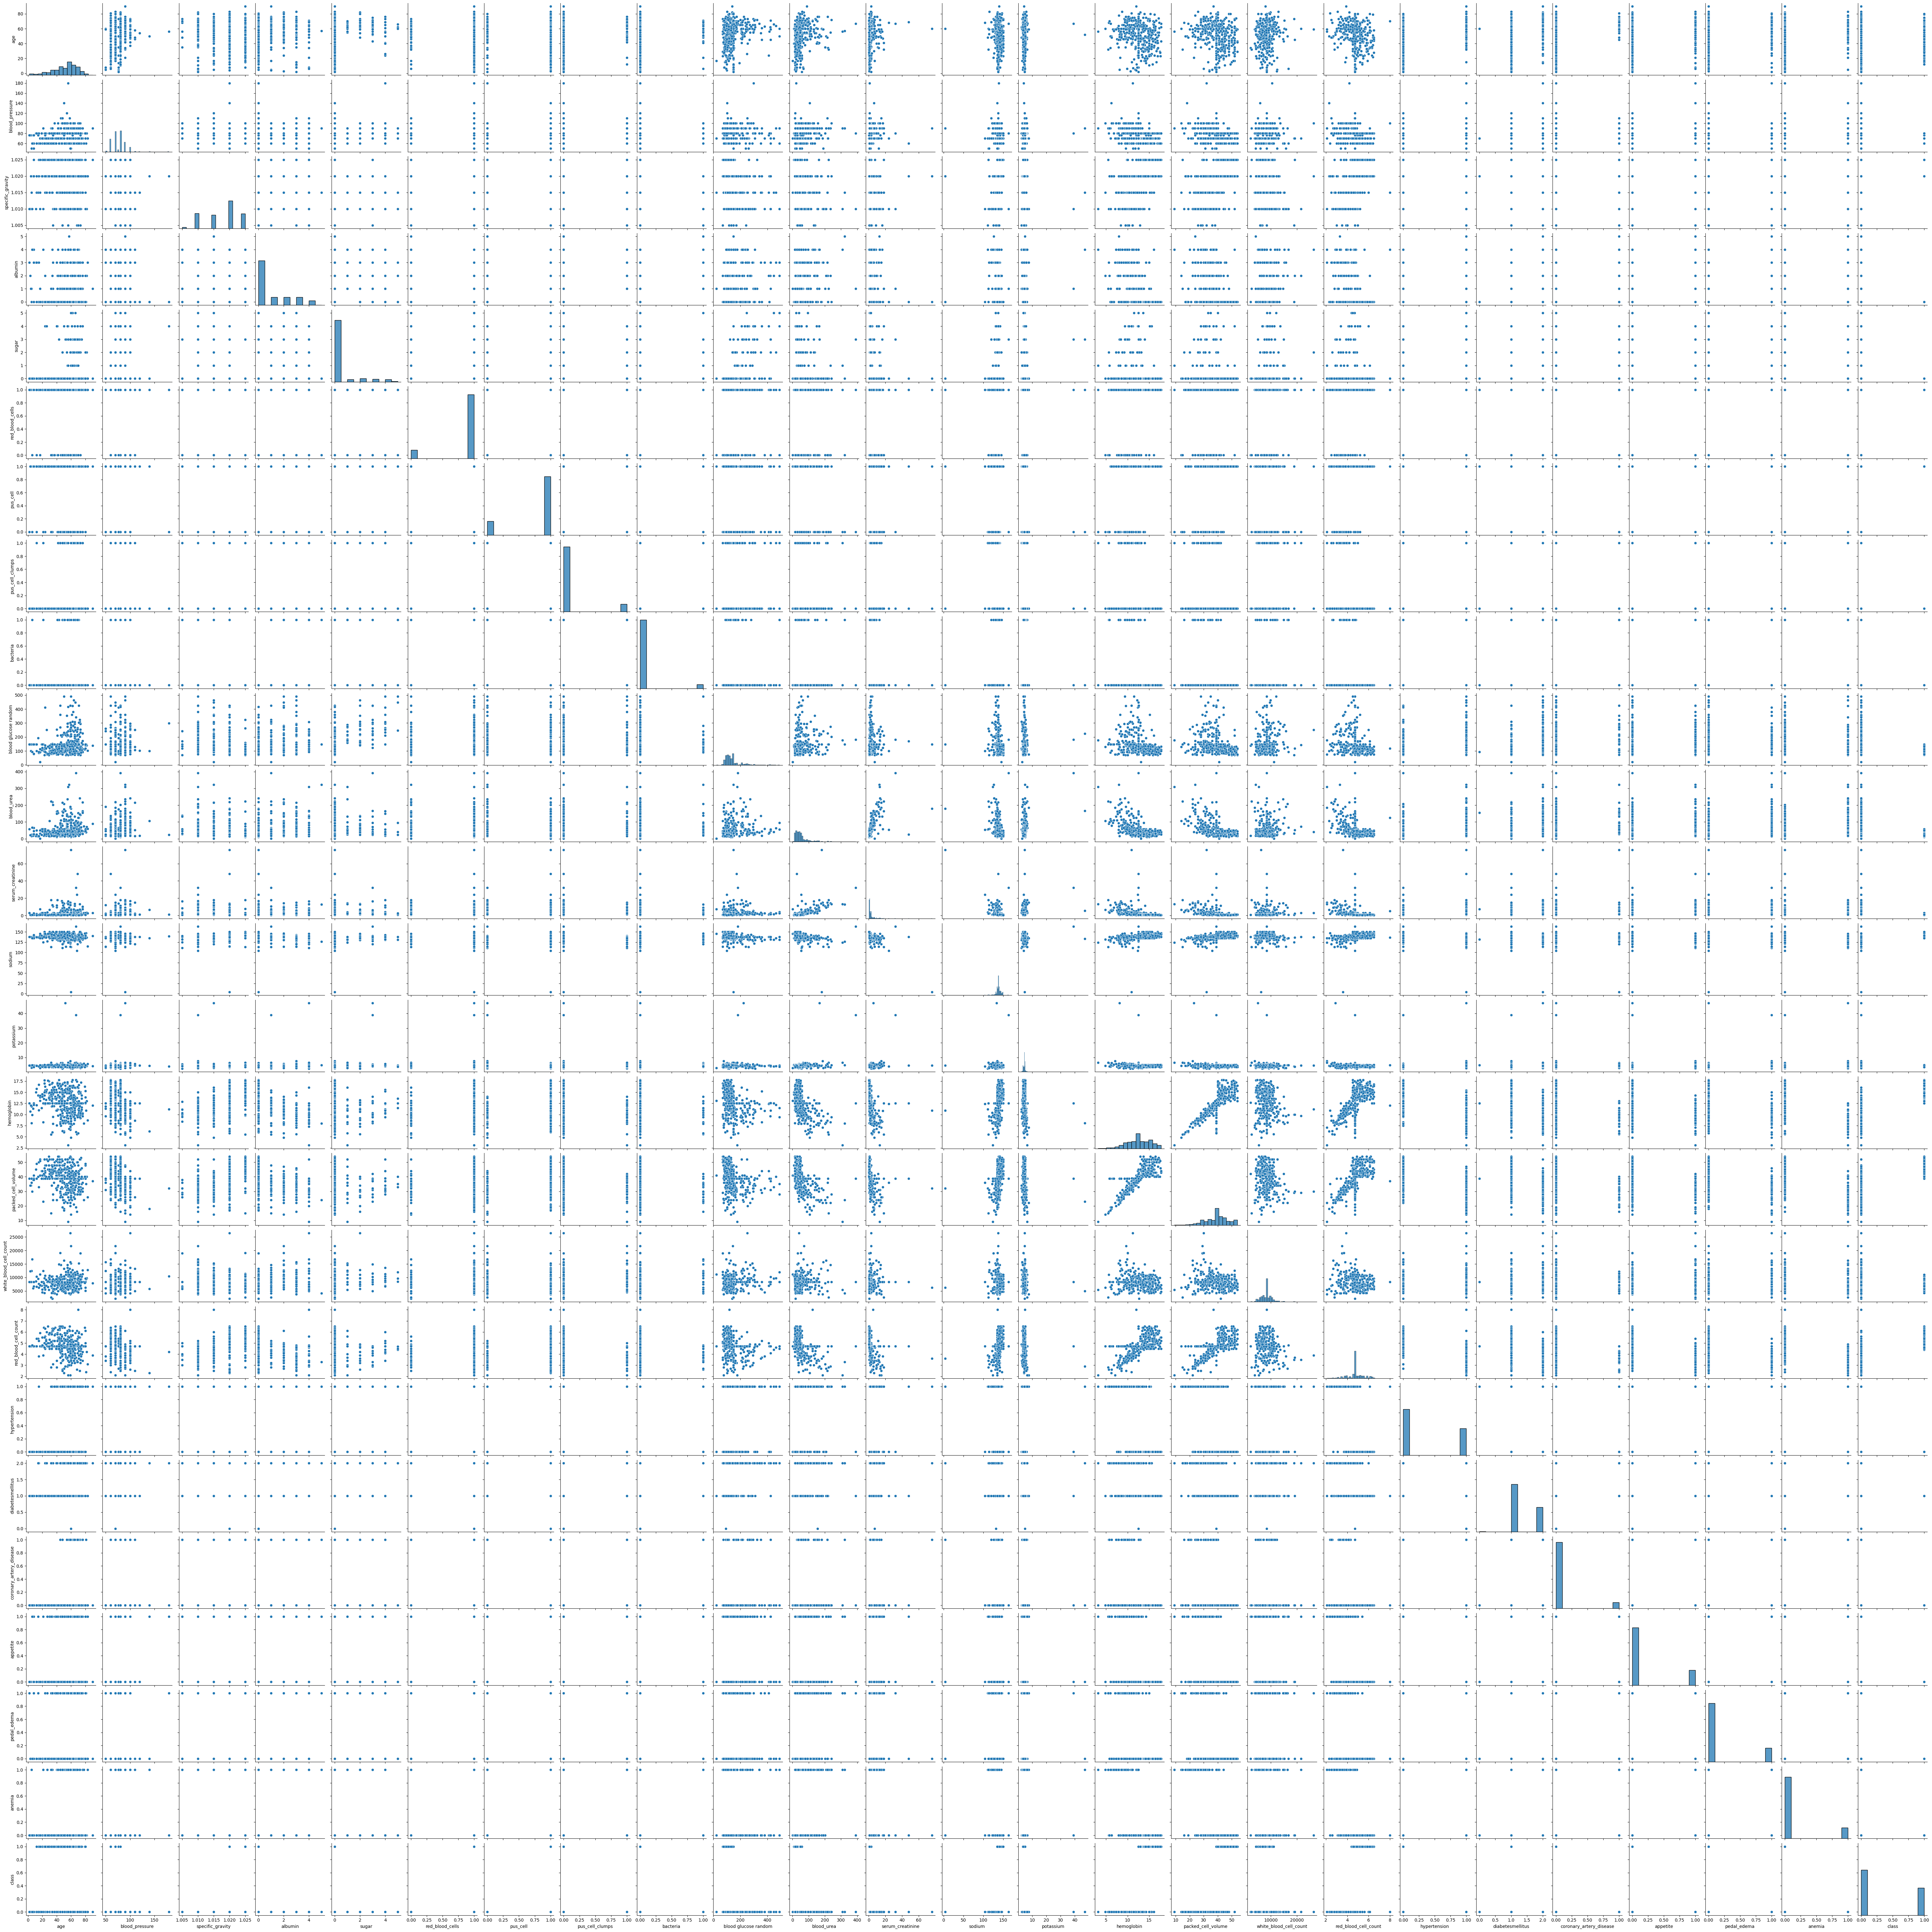

In [ ]:
sns.pairplot(data)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

In [ ]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x.head()

,red_blood_cells,pus_cell,blood glucose random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
0,1,1,121.000000,36.0,0,0,2,0
1,1,1,148.036517,18.0,0,0,1,0
2,1,1,423.000000,53.0,0,1,2,0
3,1,0,117.000000,56.0,1,1,1,0
4,1,1,106.000000,26.0,0,0,1,0


In [ ]:
pd.DataFrame(x_bal)

,0,1,2,3,4,5,6,7
0,0.36489,0.484322,-0.361987,-0.435268,-0.484322,-0.420084,1.385651,-0.304789
1,0.36489,0.484322,0.000000,-0.800941,-0.484322,-0.420084,-0.705897,-0.304789
2,0.36489,0.484322,3.681441,-0.089909,-0.484322,2.380476,1.385651,-0.304789
3,0.36489,-2.064742,-0.415543,-0.028964,2.064742,2.380476,-0.705897,-0.304789
4,0.36489,0.484322,-0.562820,-0.638420,-0.484322,-0.420084,-0.705897,-0.304789
...,...,...,...,...,...,...,...,...
395,0.36489,0.484322,-0.107600,-0.171170,-0.484322,-0.420084,-0.705897,-0.304789
396,0.36489,0.484322,-0.977874,-0.536844,-0.484322,-0.420084,-0.705897,-0.304789
397,0.36489,0.484322,-0.643153,-0.638420,-0.484322,-0.420084,-0.705897,-0.304789
398,0.36489,0.484322,-0.455709,-0.150855,-0.484322,-0.420084,-0.705897,-0.304789


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [ ]:
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 3s 14ms/step - loss: 0.7780 - accuracy: 0.5938 - val_loss: 0.5363 - val_accuracy: 0.6875
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5658 - accuracy: 0.6602 - val_loss: 0.5526 - val_accuracy: 0.6562
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5366 - accuracy: 0.6406 - val_loss: 0.5258 - val_accuracy: 0.6562
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5380 - accuracy: 0.6406 - val_loss: 0.5431 - val_accuracy: 0.6094
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.6445 - val_loss: 0.5146 - val_accuracy: 0.6562
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.6562 - val_loss: 0.5109 - val_accuracy: 0.7500
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5346 - accuracy: 0.7070 - val_loss: 0.5508 - val_accuracy: 0.5625
Epoch 8/100


In [ ]:
y_pred = classification.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
y_pred

array([[1.46267248e-05],
       [1.00345396e-01],
       [1.67273750e-15],
       [4.19729250e-03],
       [9.35119331e-01],
       [1.29085898e-08],
       [5.77964716e-12],
       [2.27748116e-12],
       [9.00978863e-01],
       [4.40276066e-10],
       [0.00000000e+00],
       [2.14409192e-05],
       [8.14180076e-01],
       [7.89736867e-01],
       [6.41541611e-37],
       [1.29482996e-18],
       [0.00000000e+00],
       [9.26175892e-01],
       [9.01222467e-01],
       [1.15804068e-13],
       [9.38606143e-01],
       [8.97051513e-01],
       [0.00000000e+00],
       [8.45153034e-01],
       [9.15832914e-07],
       [9.02611792e-01],
       [2.01047117e-28],
       [1.23808450e-12],
       [9.09364522e-01],
       [2.02380804e-07],
       [1.83027169e-06],
       [9.21451449e-01],
       [2.38670968e-02],
       [5.42210927e-03],
       [6.51008178e-15],
       [1.54825655e-04],
       [9.40131128e-01],
       [4.02335252e-04],
       [5.43425262e-01],
       [9.19981241e-01],


In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  5],
       [ 0, 26]])

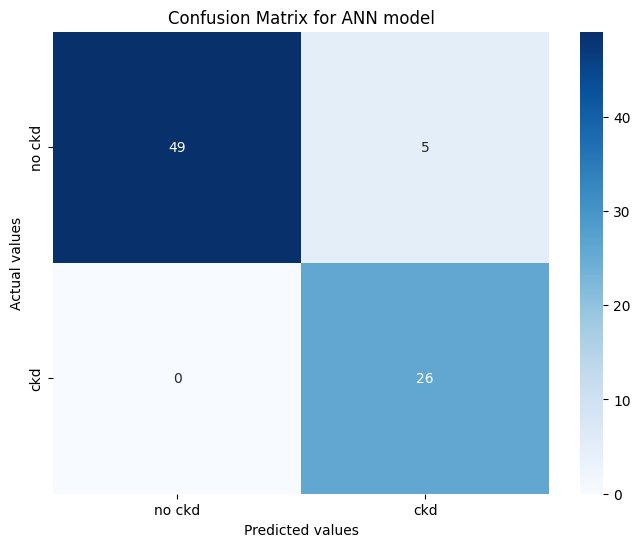

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 93.75%


In [ ]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
    sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
    sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
    sample_value = sc.transform(sample_value)

    return classifier.predict(sample_value)

In [ ]:
x.head()

,red_blood_cells,pus_cell,blood glucose random,blood_urea,pedal_edema,anemia,diabetesmellitus,coronary_artery_disease
0,1,1,121.000000,36.0,0,0,2,0
1,1,1,148.036517,18.0,0,0,1,0
2,1,1,423.000000,53.0,0,1,2,0
3,1,0,117.000000,56.0,1,1,1,0
4,1,1,106.000000,26.0,0,0,1,0


In [ ]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD.')

1/1 [==============================] - 0s 140ms/step
Prediction: Low chance of CKD.


In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        54
           1       0.84      1.00      0.91        26

    accuracy                           0.94        80
   macro avg       0.92      0.95      0.93        80
weighted avg       0.95      0.94      0.94        80



In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

y_predict = lgr.predict(x_test)

In [ ]:
print('Train accuracy score of LOG_RE:',lgr.score(x_train, y_train))
print('Test accuracy score of LOG_RE:',lgr.score(x_test, y_test))

Train accuracy score of LOG_RE: 0.909375
Test accuracy score of LOG_RE: 0.9125


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[47,  7],
       [ 0, 26]])

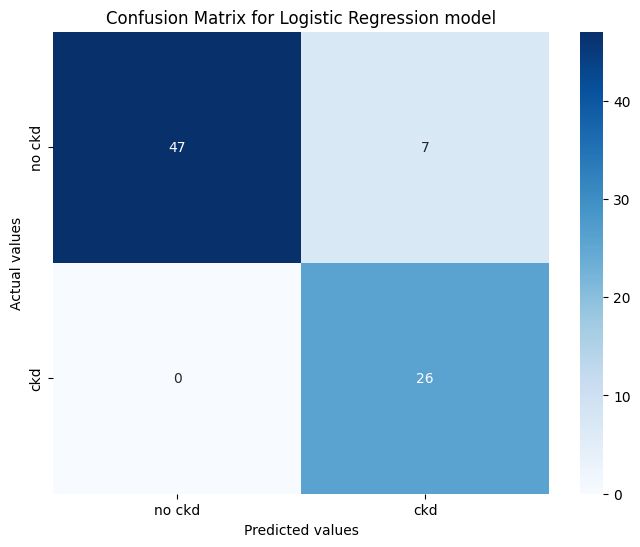

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [ ]:
def logistic(x_train,x_test,y_train,y_test):
  lgr.fit(x_train,y_train)
  y_predict = lgr.predict(x_test)
  print("")


In [ ]:
def Logistic(x_train,x_test,y_train,y_test):
    lgr=LogisticRegression()
    logistic=lgr.fit(x_train,y_train)
    predict_logistic=logistic.predict(x_test)
    training_accuracy=logistic.score(x_train,y_train)
    testing_accuracy=logistic.score(x_test,y_test)
    print("*** Logistic Regression ***")
    print("Training Accuracy : ",training_accuracy)
    print("Testing Accuracy : ",testing_accuracy)
    print("Accuracy Score : ",accuracy_score(y_test,predict_logistic))
    print("** Confusion Matrix **")
    print(confusion_matrix(y_test,predict_logistic))
    print("** Classification Report **")
    print(classification_report(y_test,predict_logistic))

In [ ]:
Logistic(x_train,x_test,y_train,y_test)

*** Logistic Regression ***
Training Accuracy :  0.909375
Testing Accuracy :  0.9125
Accuracy Score :  0.9125
** Confusion Matrix **
[[47  7]
 [ 0 26]]
** Classification Report **
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        54
           1       0.79      1.00      0.88        26

    accuracy                           0.91        80
   macro avg       0.89      0.94      0.91        80
weighted avg       0.93      0.91      0.91        80



/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        54
           1       0.79      1.00      0.88        26

    accuracy                           0.91        80
   macro avg       0.89      0.94      0.91        80
weighted avg       0.93      0.91      0.91        80



In [ ]:
y_pred = lgr.predict([[129,99,1,0,0,1,0,1]])

print(y_pred)
(y_pred)

[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])

print(y_pred)
(y_pred)

[1]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predict= dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
y_predict_train = dtc.predict(x_train)

In [ ]:
print('Testing accuracy = ', accuracy_score(y_test,y_predict))
print("Training accuracy= ",accuracy_score(y_train,y_predict_train))

Testing accuracy =  0.9625
Training accuracy=  0.915625


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[52,  2],
       [ 1, 25]])

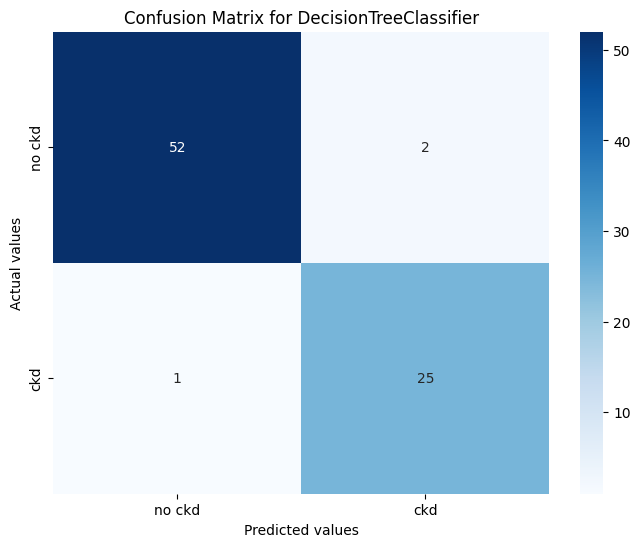

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.93      0.96      0.94        26

    accuracy                           0.96        80
   macro avg       0.95      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
rfc.fit(x_train,y_train)

<ipython-input-104-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predict = rfc.predict(x_test)

In [ ]:
y_predict_train = rfc.predict(x_train)

In [ ]:
print('Training accuracy: ',accuracy_score(y_train,y_predict_train))
print('Testing accuracy: ',accuracy_score(y_test,y_predict))

Training accuracy:  0.9875
Testing accuracy:  0.9375


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[52,  2],
       [ 3, 23]])

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.92      0.88      0.90        26

    accuracy                           0.94        80
   macro avg       0.93      0.92      0.93        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
y_train.value_counts()

class
0        196
1        124
dtype: int64

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('DecisionTree',DecisionTreeClassifier()),
          ('ANN',MLPClassifier())
        ]